In [13]:
#(1) Data Description
library(tidyverse)

#read data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

#basic info
players_basic_info <- glimpse(players)
sessions_basic_info <- glimpse(sessions)

#summary statistics
players_summary_statistics <- summary(players)
sessions_summary_statistics <- summary(sessions)

players_summary_statistics
sessions_summary_statistics

#data description table
players_data_description <- tibble(variable = names(players), meaning = c( "Player experience level",
    "Subscriber status", "Hashed email (anonymous ID)", "Hours the player has played", "Player name",
    "Player gender", "Player age"))

players_data_description

sessions_data_description <- tibble(variable = names(sessions), meaning = c( "Hashed email linking to players.csv",
    "Session start time (string)", "Session end time (string)", "Original system timestamp (start)",
    "Original system timestamp (end)"))

sessions_data_description

#missing values 
players_missing_values <- players |>
    summarise(across(everything(), ~sum(is.na(.))))

players_missing_values

sessions_missing_values <- sessions |>
    summarise(across(everything(), ~sum(is.na(.))))

sessions_missing_values

#data description tables
players_data_description_table <- tibble(variable = names(players), type = sapply(players, class), 
                                missing = sapply(players, function(x) sum(is.na(x))), 
                                example = sapply(players, function(x) paste(head(x, 3), collapse = ",")),
                                mean = sapply(players, function(x) if(is.numeric(x)) round(mean(x, na.rm = TRUE), 2) else NA),
                                sd = sapply(players, function(x) if(is.numeric(x)) round(sd(x, na.rm = TRUE), 2) else NA),
                                min = sapply(players, function(x) if(is.numeric(x)) min(x, na.rm = TRUE) else NA),
                                max = sapply(players, function(x) if(is.numeric(x)) max(x, na.rm = TRUE) else NA))
players_data_description_table

sessions_data_description_table <- tibble(variable = names(sessions), type = sapply(sessions, class),
                                 missing = sapply(sessions, function(x) sum(is.na(x))),
                                 example = sapply(sessions, function(x) paste(head(x, 3), collapse = ", ")),
                                 mean = sapply(sessions, function(x) if(is.numeric(x)) round(mean(x, na.rm = TRUE), 2) else NA),
                                 sd = sapply(sessions, function(x) if(is.numeric(x)) round(sd(x, na.rm = TRUE), 2) else NA),
                                 min = sapply(sessions, function(x) if(is.numeric(x)) min(x, na.rm = TRUE) else NA),
                                 max = sapply(sessions, function(x) if(is.numeric(x)) max(x, na.rm = TRUE) else NA))
sessions_data_description_table
                                                                                                               

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

variable,meaning
<chr>,<chr>
experience,Player experience level
subscribe,Subscriber status
hashedEmail,Hashed email (anonymous ID)
played_hours,Hours the player has played
name,Player name
gender,Player gender
Age,Player age


variable,meaning
<chr>,<chr>
hashedEmail,Hashed email linking to players.csv
start_time,Session start time (string)
end_time,Session end time (string)
original_start_time,Original system timestamp (start)
original_end_time,Original system timestamp (end)


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


variable,type,missing,example,mean,sd,min,max
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
experience,character,0,"Pro,Veteran,Veteran",NA,NA,NA,NA
subscribe,logical,0,"TRUE,TRUE,FALSE",NA,NA,NA,NA
hashedEmail,character,0,"f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28",NA,NA,NA,NA
played_hours,numeric,0,"30.3,3.8,0",5.85,28.36,0,223.1
name,character,0,"Morgan,Christian,Blake",NA,NA,NA,NA
gender,character,0,"Male,Male,Male",NA,NA,NA,NA
Age,numeric,2,"9,17,17",21.14,7.39,9,58.0


variable,type,missing,example,mean,sd,min,max
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
hashedEmail,character,0,"bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf, 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686, f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc",NA,NA,NA,NA
start_time,character,0,"30/06/2024 18:12, 17/06/2024 23:33, 25/07/2024 17:34",NA,NA,NA,NA
end_time,character,2,"30/06/2024 18:24, 17/06/2024 23:46, 25/07/2024 17:57",NA,NA,NA,NA
original_start_time,numeric,0,"1.71977e+12, 1.71867e+12, 1.72193e+12",1.719201e+12,3557491589,1.7124e+12,1.72733e+12
original_end_time,numeric,2,"1.71977e+12, 1.71867e+12, 1.72193e+12",1.719196e+12,3552813134,1.7124e+12,1.72734e+12


In [26]:
#(1) Data Description:
#Players Data Set
players_data_description_bullets <- c("Players Data Description", 
                            "- Number of Observations: 1372", "- Number of Vaiables: 7",
                            "Summary Statistics: played_hours",
                            "- Median: 0.10", "- Mean: 5.846", "- Standard Deviation: 28.36", "- Min: 0.00", "- Max: 223.10",
                            "Summary Statistics: Age",
                            "- Median: 19.00", "- Mean: 21.14", "- Standard Deviation: 7.39", "- Min: 9.00", "- Max: 58.00") 
cat(players_data_description_bullets, sep = "\n")

players_data_description_table
players_missing_values          


#Sessions Data Set
sessions_data_description_bullets <- c("Sessions Data Description", "- Number of Observations: 7675", "- Number of Vaiables: 5",
                            "Summary Statistics: origional_start_time",
                            "- Median: 1.719e+12", "- Mean: 1.719e+12", "- Standard Deviation: 3557491589", "- Min: 1.712e+12", "- Max: 1.727e+12",
                            "Summary Statistics: origional_end_time",
                            "- Median: 1.719e+12", "- Mean: 1.719e+12", "- Standard Deviation: 3552813134", "- Min: 1.712e+12", "- Max: 1.727e+12") 
cat(sessions_data_description_bullets, sep = "\n")

sessions_data_description_table
sessions_missing_values

Players Data Description
- Number of Observations: 1372
- Number of Vaiables: 7
Summary Statistics: played_hours
- Median: 0.10
- Mean: 5.846
- Standard Deviation: 28.36
- Min: 0.00
- Max: 223.10
Summary Statistics: Age
- Median: 19.00
- Mean: 21.14
- Standard Deviation: 7.39
- Min: 9.00
- Max: 58.00


variable,type,missing,example,mean,sd,min,max
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
experience,character,0,"Pro,Veteran,Veteran",NA,NA,NA,NA
subscribe,logical,0,"TRUE,TRUE,FALSE",NA,NA,NA,NA
hashedEmail,character,0,"f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28",NA,NA,NA,NA
played_hours,numeric,0,"30.3,3.8,0",5.85,28.36,0,223.1
name,character,0,"Morgan,Christian,Blake",NA,NA,NA,NA
gender,character,0,"Male,Male,Male",NA,NA,NA,NA
Age,numeric,2,"9,17,17",21.14,7.39,9,58.0


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,2


Sessions Data Description
- Number of Observations: 7675
- Number of Vaiables: 5
Summary Statistics: origional_start_time
- Median: 1.719e+12
- Mean: 1.719e+12
- Standard Deviation: 3557491589
- Min: 1.712e+12
- Max: 1.727e+12
Summary Statistics: origional_end_time
- Median: 1.719e+12
- Mean: 1.719e+12
- Standard Deviation: 3552813134
- Min: 1.712e+12
- Max: 1.727e+12


variable,type,missing,example,mean,sd,min,max
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
hashedEmail,character,0,"bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf, 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686, f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc",NA,NA,NA,NA
start_time,character,0,"30/06/2024 18:12, 17/06/2024 23:33, 25/07/2024 17:34",NA,NA,NA,NA
end_time,character,2,"30/06/2024 18:24, 17/06/2024 23:46, 25/07/2024 17:57",NA,NA,NA,NA
original_start_time,numeric,0,"1.71977e+12, 1.71867e+12, 1.72193e+12",1.719201e+12,3557491589,1.7124e+12,1.72733e+12
original_end_time,numeric,2,"1.71977e+12, 1.71867e+12, 1.72193e+12",1.719196e+12,3552813134,1.7124e+12,1.72734e+12


hashedEmail,start_time,end_time,original_start_time,original_end_time
<int>,<int>,<int>,<int>,<int>
0,0,2,0,2


In [44]:
cat("(2) Questions
Broad Question: what time windows are most likely to have a large number of simultaneous players?
Specific Question: is the classification of weekday or weekend a predictor of a large number of simultaneous players?

The data contains player IDs as well as timestamps of player sessions which can be classified as either weekday or weekend,  
then we can find the average number of players online per minute and classify this minute as either weekday or weekend. The 
number of players online is a numeric respinse variable that can be predicted by a the numeric predictor of average players
online per minute.")


(2) Questions
Broad Question: what time windows are most likely to have a large number of simultaneous players?
Specific Question: is the classification of weekday or weekend a predictor of a large number of simultaneous players?

The data contains player IDs as well as timestamps of player sessions which can be classified as either weekday or weekend,  
then we can find the average number of players online per minute and classify this minute as either weekday or weekend. The 
number of players online is a numeric respinse variable that can be predicted by a the numeric predictor of average players
online per minute.

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

variable,mean_value
<chr>,<dbl>
played_hours,5.85
Age,21.14


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


[1] "Majority of observations lie in the 10-30 year old range and 15-20 year olds logged the highed played_hours"

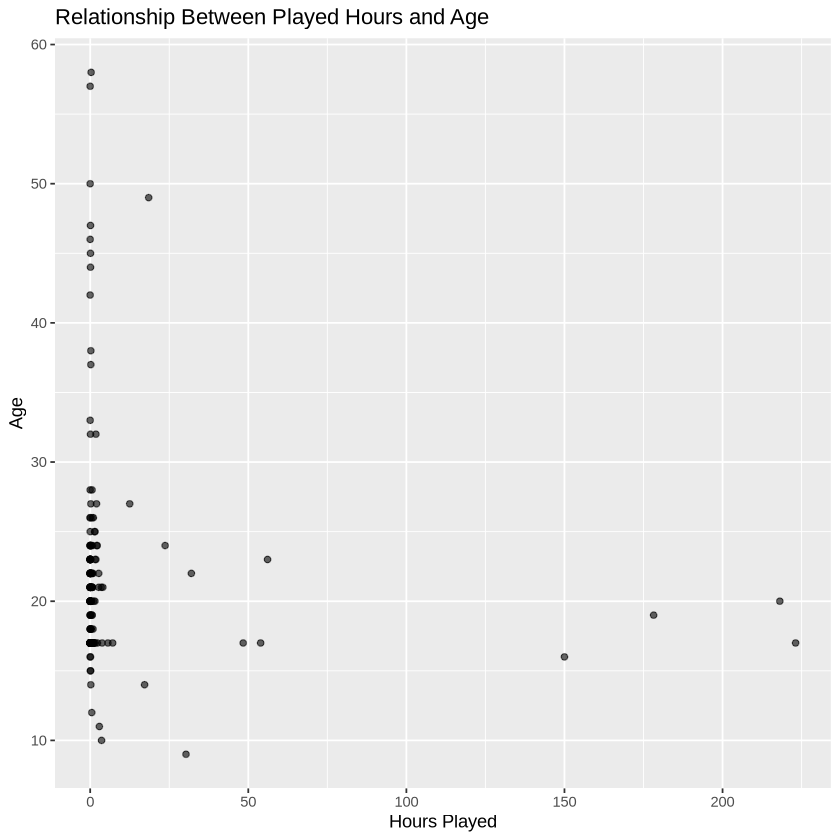

[1] "Players of a regular experience level had the highed average hours_played"

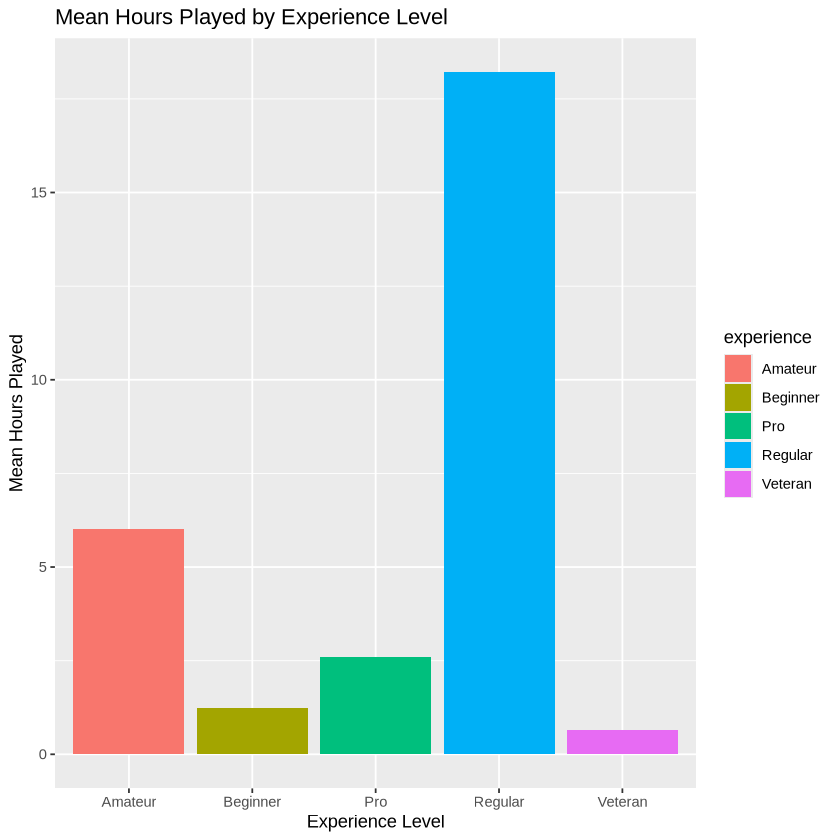

[1] "Players identigying as Non-binary had the highest average hours_played"

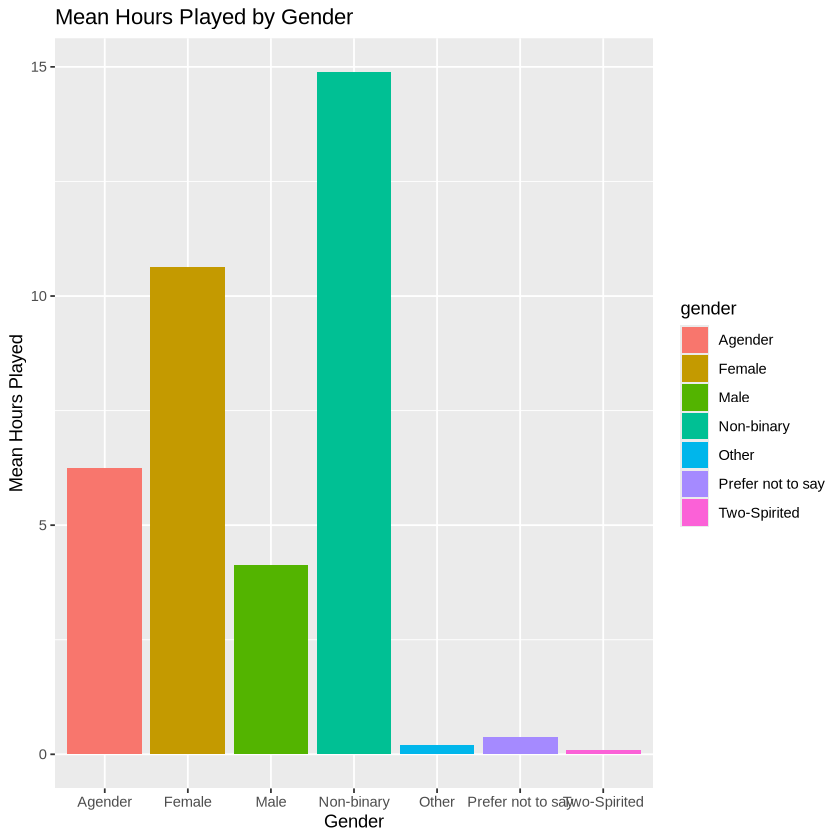

In [41]:
#(3) Exploratory Data Analysis and Visualization

library(tidyverse)

#read data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

#demonstrate successful loading
glimpse(players)
glimpse(sessions)

#Wrangling and means
player_means <- players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

player_means_table <- player_means |>
  pivot_longer(everything(), names_to = "variable", values_to = "mean_value")

player_means_table

#relationship between age and played hours
age_vs_played_hours_plot <- players |>
                            ggplot(aes(x = played_hours, y = Age)) +
                            geom_point(alpha = 0.6) +
                            labs(title = "Relationship Between Played Hours and Age",
                            x = "Hours Played", y = "Age")
age_vs_played_hours_plot
cat("Majority of observations lie in the 10-30 year old range and 15-20 year olds logged the highed played_hours"
#relationship between experience and played hours
experience_vs_played_hours_plot <- players |>
                                group_by(experience) |>
                                summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
                                ggplot(aes(x = experience, y = mean_hours, fill = experience)) +
                                geom_col() +
                                labs(title = "Mean Hours Played by Experience Level",
                                x = "Experience Level",
                                y = "Mean Hours Played")
experience_vs_played_hours_plot
"Players of a regular experience level had the highed average hours_played"
#relationship between gender and played hours
gender_vs_played_hours_plot <- players |>
                                group_by(gender) |>
                                summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
                                ggplot(aes(x = gender, y = mean_hours, fill = gender)) +
                                geom_col() +
                                labs(title = "Mean Hours Played by Gender",
                                x = "Gender",
                                y = "Mean Hours Played")
gender_vs_played_hours_plot
"Players identigying as Non-binary had the highest average hours_played"

In [48]:
#(4) Methods and Plan
cat("(4) Methods and Plan
    Linear Regression is an appropriate model to answer the question, is the classification of weekday or weekend a 
predictor of a large number of simultaneous players, because the response variable is numeric (number of simultaneous players)
and we want to be able to predict the the number of simultaneous players at any given time based on the data availible. 
We must make the assumption that the relationship between our chosen time period and number of simultaneous players is 
linear. The weakness of the linear regression model is that is obersvations are clustered and not spread evenly across our 
chose time period intervals then it could make our training of the data unreliable. I am going to explore the lineraity of 
the relationship between several different time period intervals through visualization to select the specifications for 
my predictor. I will have to wrangle the data to get the average simultaneous players per minute then split the data into 
a training and testing set, then perform a 5 fold cross valdation on my training data before applying the model to the 
testing set.")

(4) Methods and Plan
    Linear Regression is an appropriate model to answer the question, is the classification of weekday or weekend a 
predictor of a large number of simultaneous players, because the response variable is numeric (number of simultaneous players)
and we want to be able to predict the the number of simultaneous players at any given time based on the data availible. 
We must make the assumption that the relationship between our chosen time period and number of simultaneous players is 
linear. The weakness of the linear regression model is that is obersvations are clustered and not spread evenly across our 
chose time period intervals then it could make our training of the data unreliable. I am going to explore the lineraity of 
the relationship between several different time period intervals through visualization to select the specifications for 
my predictor. I will have to wrangle the data to get the average simultaneous players per minute then split the data into 
a 